<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/Using_PCA_OLS_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving longley.csv to longley.csv


In [ ]:
df_1 = pd.read_csv("longley.csv")
print(len(df_1))

16


In [ ]:
df = df_1.drop(['TOTEMP','YEAR','Obs'],axis=1)
df.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


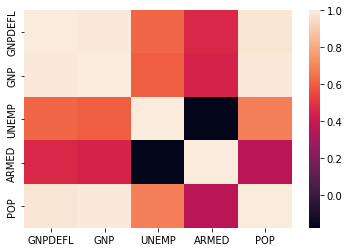

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
X = df
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


In [ ]:
Y = df_1['TOTEMP']
Y.head()


0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

In [ ]:
import statsmodels.api as sm

#this adds a constant term beta0 to the multiple linear regression

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.70e-09
Time:                        08:31:36   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.246e+04   3.52e+04      2.629      0.025    1.41e+04    1.71e+05
GNPDEFL      -48.4628    132.248     -0.366      0.722    -343.129     246.204
GNP            0.0720      0.032      2.269      0.047       0.001       0.143
UNEMP         -0.4039      0.439     -0.921      0.379      -1.381       0.573
ARMED         -0.5605      0.284     -1.975      0.077      -1.193       0.072
POP           -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.multivariate.pca import PCA
pc = PCA(df,ncomp=1,standardize=True)

df_comp = pc.loadings.T

df_comp

,GNPDEFL,GNP,UNEMP,ARMED,POP
comp_0,0.521013,0.519909,0.365806,0.229642,0.52124


PC1: Armed and unemployed are inversely correlated since if you are in the army you will not be unemployed. In PC0, GNPDEFL,GNP and POP have all got north of 0.52 corr which means that PC0 is reflective of GNPDEFL,GNP and POP as opposed to UNEMP and ARMED.

In [ ]:
X_scores = pc.factors
X_scores

,comp_0
0,-0.421723
1,-0.364998
2,-0.276955
3,-0.253868
4,-0.168318
5,-0.117556
6,-0.085413
7,0.013020
8,0.007821
9,0.046341


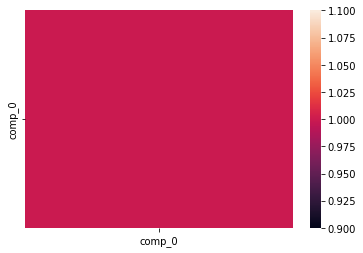

In [ ]:
sns.heatmap(X_scores.corr())
plt.show()

In [ ]:
X_pca = sm.add_constant(X_scores)
model = sm.OLS(Y,X_pca).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.62e-08
Time:                        09:01:00   Log-Likelihood:                -134.04
No. Observations:                  16   AIC:                             272.1
Df Residuals:                      14   BIC:                             273.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+04    281.263    232.228      0.000    6.47e+04    6.59e+04
comp_0      1.293e+04   1125.050     11.496      0.000    1.05e+04    1.53e+04
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.484
Skew:                          -0.207   Prob(JB):                        0.785
Kurtosis:                       2.256   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""